### time series analysis on australian drug sales:

In [11]:
from dateutil.parser import parse
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [12]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])
df.head()


,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [13]:
ser = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'],index_col='date')
ser.head()


,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


In [14]:
## panel data contain additional column(explanatory variable) which helps in predicitng y, provided that this is available
# in the future forecast as well

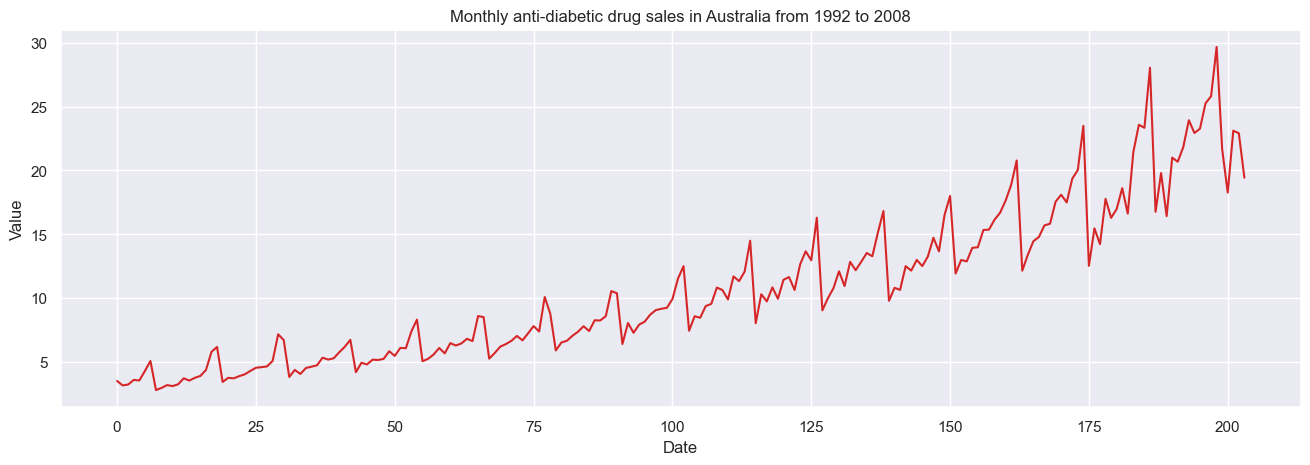

In [15]:
def plot_df(df,x,y,title="",xlabel='Date',ylabel='Value',dpi=100):
    plt.figure(figsize=(16,5),dpi=dpi)
    plt.plot(x,y,color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel,ylabel=ylabel)
    plt.show()

plot_df(df,x=df.index,y=df.value,title='Monthly anti-diabetic drug sales in Australia from 1992 to 2008')

In [16]:
x = df['date'].values
y1 = df['value'].values

In [17]:
df['value'].describescribe()

AttributeError: 'Series' object has no attribute 'describescribe'

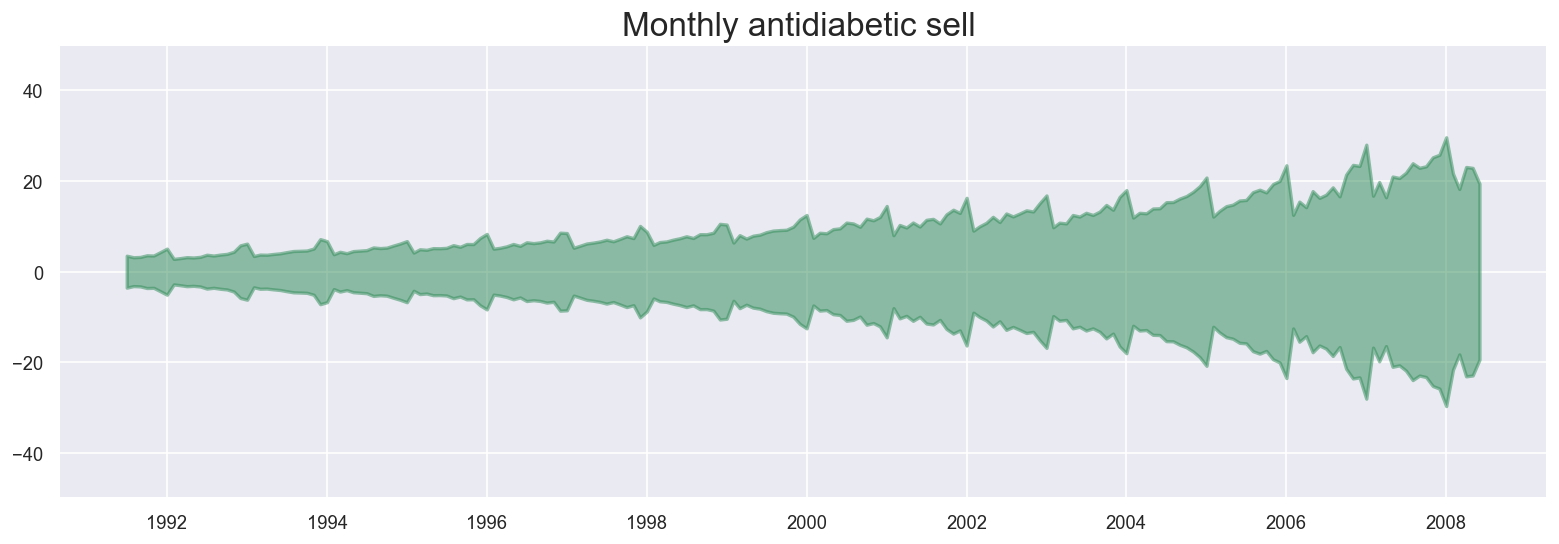

In [18]:
# plot
fig,ax = plt.subplots(1,1,figsize=(16,5),dpi=120)
plt.fill_between(x=x, y1=y1, y2=-y1,alpha=0.5, linewidth=2,color='seagreen')
plt.ylim(-50,50)
plt.title('Monthly antidiabetic sell ',fontsize=20)
plt.show()

In [19]:
## since its a monthly time series and follows certain repititive pattern every year, we can plot each year as a separate
# line in the same plot --- to compare year wise pattern side by side

### prepare the data

In [20]:
df['year']=[d.year for d in df.date]
df['month']=[d.strftime('%b') for d in df.date]
years = df['year'].unique()

In [21]:
df.head()

,date,value,year,month
0,1991-07-01,3.526591,1991,Jul
1,1991-08-01,3.180891,1991,Aug
2,1991-09-01,3.252221,1991,Sep
3,1991-10-01,3.611003,1991,Oct
4,1991-11-01,3.565869,1991,Nov


In [22]:
### prep color

np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

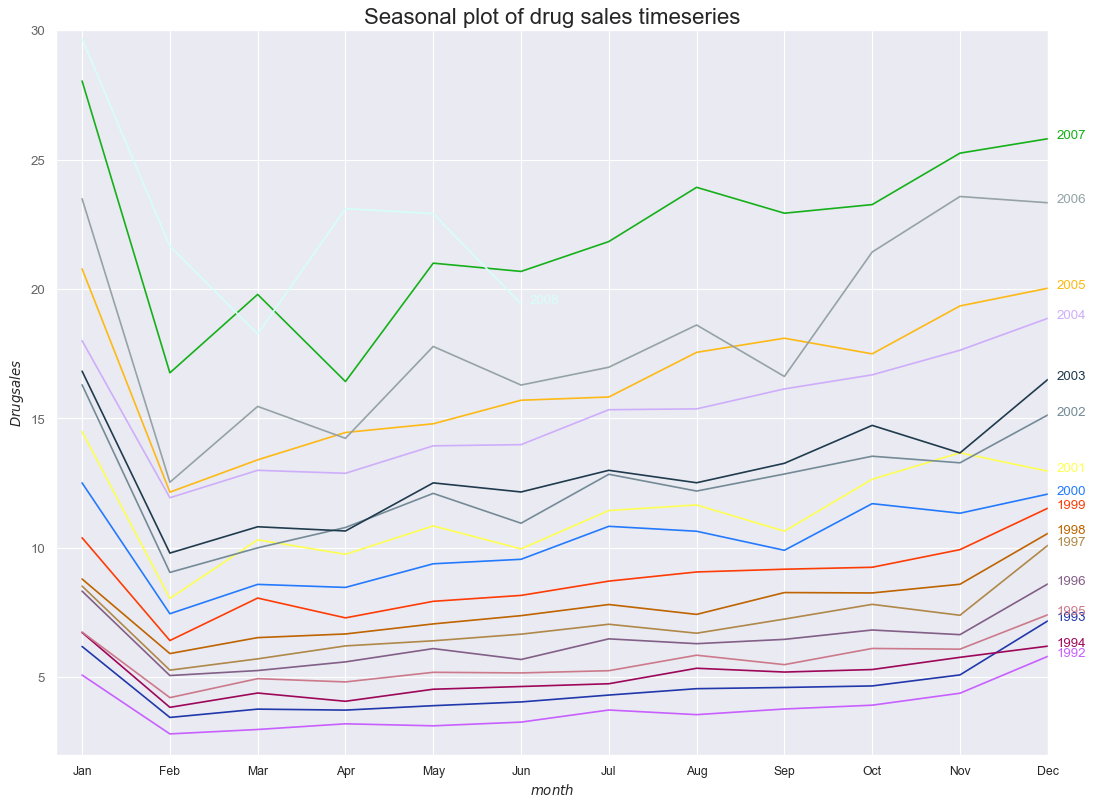

In [23]:
## draw plot
plt.figure(figsize=(16,12),dpi=80)

for i,y in enumerate(years):
    if i>0:
        plt.plot('month','value',data=df.loc[df.year==y,:],color = mycolors[i],label=y)
        plt.text(df.loc[df.year==y,:].shape[0]-.9, df.loc[df.year==y,'value'][-1:].values[0],y,fontsize=12,color=mycolors[i])
        
        

## decoration

plt.gca().set(xlim=(-0.3,11),ylim=(2,30),ylabel='$Drug sales$',xlabel='$month$')
plt.yticks(fontsize=12,alpha=0.7)
plt.title('Seasonal plot of drug sales timeseries',fontsize=20)
plt.show()


there is a steep fall of drug sell every feburay, increase in march and fall in april and the pattern goes on

this same pattern in seen in every year sales bu the total sales is increasing every year

### Boxplot of month-wise and year-wise distribution

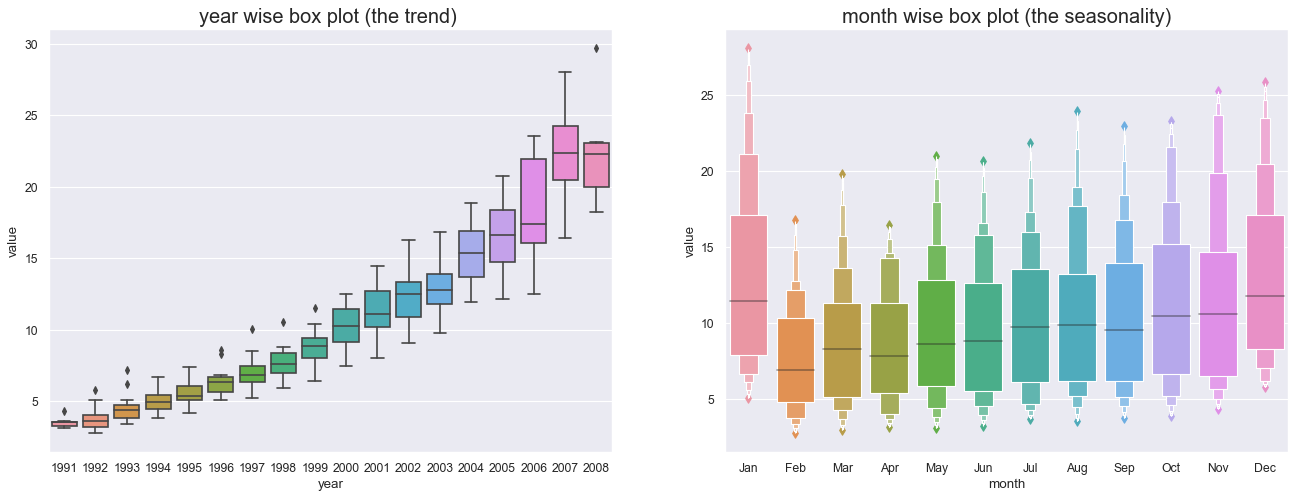

In [24]:
fig,ax = plt.subplots(1,2,figsize=(20,7),dpi=80)
sns.boxplot(x='year',y='value',data=df,ax=ax[0])
sns.boxenplot(x='month',y='value',data=df.loc[~df.year.isin([1991,2008]),:])

# set title
ax[0].set_title('year wise box plot (the trend) ',fontsize=18)
ax[1].set_title('month wise box plot (the seasonality)',fontsize=18)
plt.show()

we can see high drug sales in december and january, this could mean holiday season discount

### Patterns in Time series

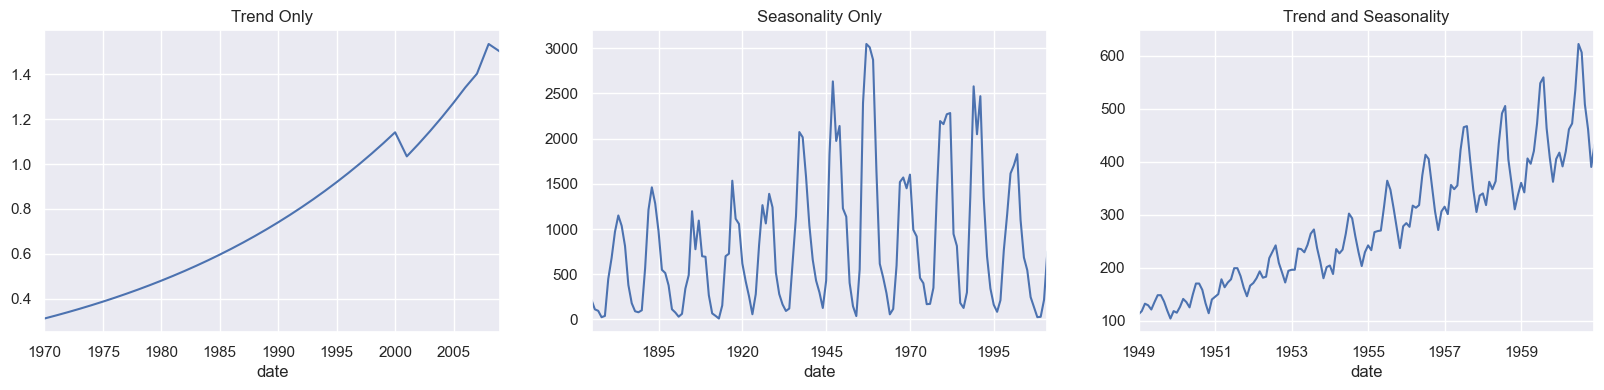

In [25]:
fig, axes = plt.subplots(1,3, figsize=(20,4), dpi=100)
pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/guinearice.csv', parse_dates=['date'], index_col='date').plot(title='Trend Only', legend=False, ax=axes[0])

pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/sunspotarea.csv', parse_dates=['date'], index_col='date').plot(title='Seasonality Only', legend=False, ax=axes[1])

pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/AirPassengers.csv', parse_dates=['date'], index_col='date').plot(title='Trend and Seasonality', legend=False, ax=axes[2])

### Decompose Time series into its components

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [27]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')


Text(0.5, 0.98, 'additive decompose')

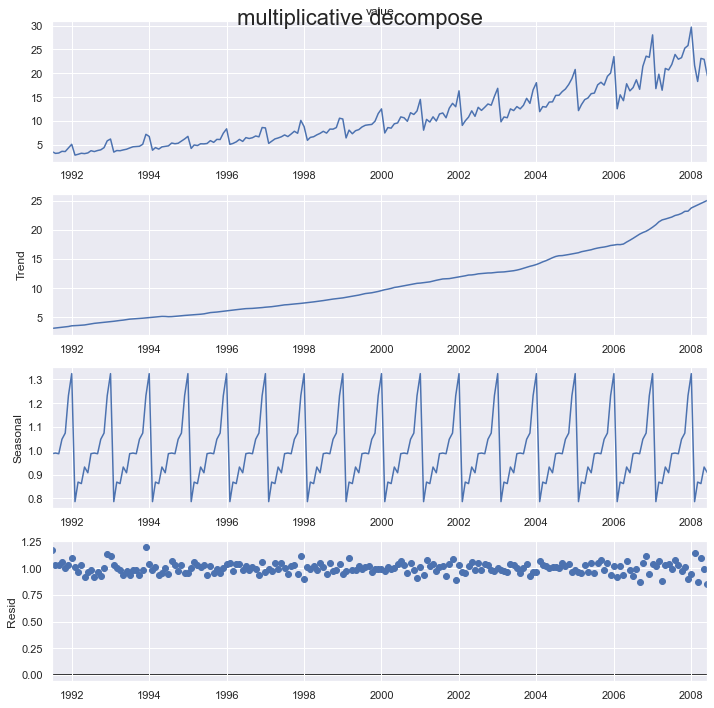

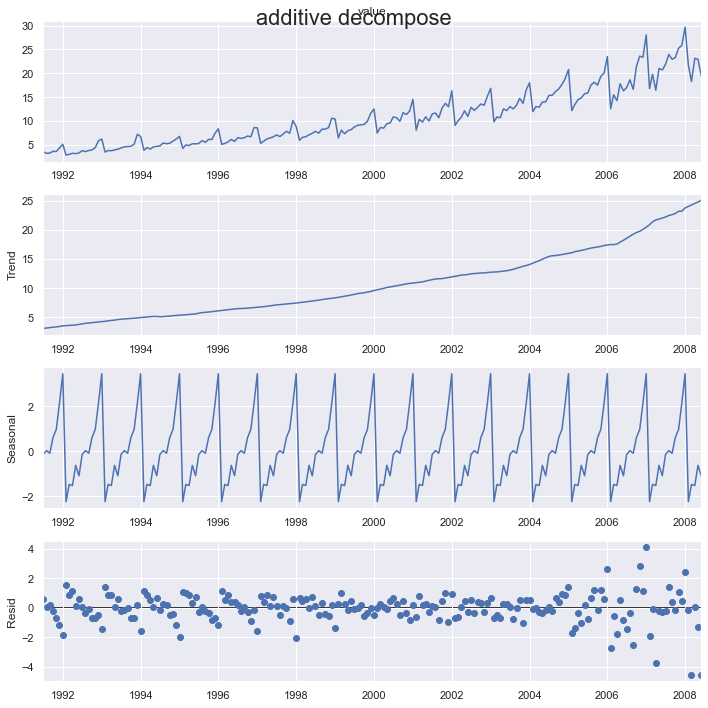

In [28]:
# multiplicative decomposition
result_mul = seasonal_decompose(df['value'],model='multiplicative',extrapolate_trend='freq')
# additive decompostition
result_add = seasonal_decompose(df['value'],model='additive',extrapolate_trend='freq')

#plot
plt.rcParams.update({'figure.figsize':(10,10)})
result_mul.plot().suptitle('multiplicative decompose',fontsize=22)
result_add.plot().suptitle('additive decompose',fontsize=22)


In [29]:
# setting extrapolate trend ='freq' takes care of any missing value in the trend and residual at the beginning of the
# series


as we look at additive residual, we can observe some pattern but the multiplicative noise looks random.
thus we should go for multiplicative decompostion for this data/series

the numerical output of the trend, seasonal and residual component are stored in result_mul output. 

In [30]:
# extract the components

df_reconstructed = pd.concat([result_mul.seasonal,result_mul.trend,result_mul.resid, result_mul.observed],axis=1)
df_reconstructed.columns=['seasonal','trend','resid','actual_values']
df_reconstructed.head()


,seasonal,trend,resid,actual_values
date,,,,
1991-07-01,0.987845,3.060085,1.166629,3.526591
1991-08-01,0.990481,3.124765,1.027745,3.180891
1991-09-01,0.987476,3.189445,1.032615,3.252221
1991-10-01,1.048329,3.254125,1.058513,3.611003
1991-11-01,1.074527,3.318805,0.999923,3.565869


In [31]:
## to check: the product of seasonal, trend and resid column should exactly equal to actual_values

### test to check for stationarity of the time series

In [32]:
from statsmodels.tsa.stattools import adfuller,kpss

In [33]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')


In [34]:
df.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


#### ADF test

In [35]:
result = adfuller(df.value.values,autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'P-value: {result[1]}')
for key,value in result[4].items():
    print('Citical value: ')
    print('-----------------')
    print(f'{key}:{value}')
      

ADF Statistic: 3.1451856893067434
P-value: 1.0
Citical value: 
-----------------
1%:-3.465620397124192
Citical value: 
-----------------
5%:-2.8770397560752436
Citical value: 
-----------------
10%:-2.5750324547306476


since p-value is not <0.05 we accept the null hypothesis-- thus the series posses a unit root is not-stationary

#### KPSS test

In [36]:
result = kpss(df.value.values,regression='c')
print('\nKPSS statistic: %f'%result[0])
print('\np-value statistic:  %f'%result[1])
for key,value in result[3].items():
    print('\nCritical values: ')
    print('-----------------------')
    print(f'{key}: {value}')


KPSS statistic: 1.313675

p-value statistic:  0.010000

Critical values: 
-----------------------
10%: 0.347

Critical values: 
-----------------------
5%: 0.463

Critical values: 
-----------------------
2.5%: 0.574

Critical values: 
-----------------------
1%: 0.739


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


#### White noise

a white noise is a random noise with mean of 0, also it has no pattern

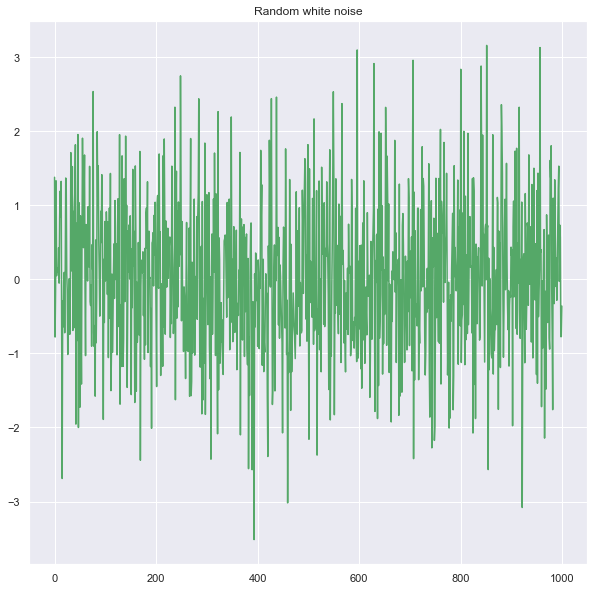

In [37]:
random_num = np.random.randn(1000)
pd.Series(random_num).plot(title='Random white noise', color='g')
plt.show()

#### Detrending a time-series

In [38]:
### approach 1: subtract the line of best fit from the actual values
## let us use scipy to subtract the line of best fit

In [39]:
from scipy import signal

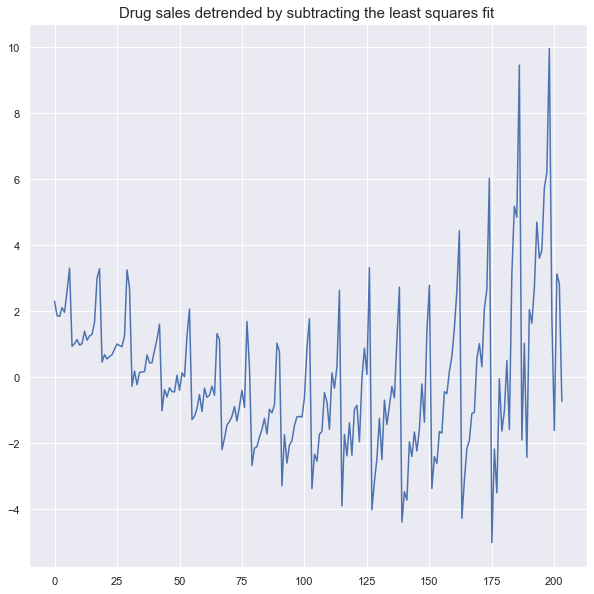

In [40]:
detrended = signal.detrend(df.value.values)
plt.plot(detrended)
plt.title('Drug sales detrended by subtracting the least squares fit ',fontsize=15)
plt.show()

In [41]:
#### approach 2: using statsmodel, subtracting the trend component

Text(0.5, 1.0, 'Drug sale detrended by subtracting the trend component')

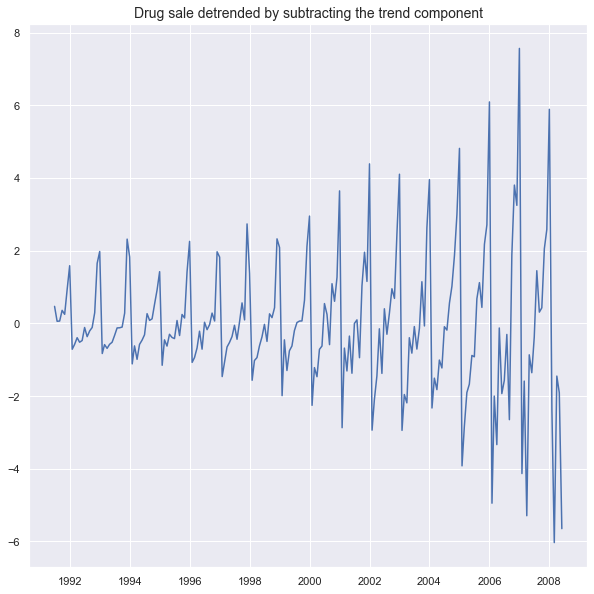

In [42]:
result_mul = seasonal_decompose(df['value'],model='multiplicative',extrapolate_trend='freq')
detrended = df.value.values-result_mul.trend
plt.plot(detrended)
plt.title('Drug sale detrended by subtracting the trend component',fontsize=14)

#### Deseasonalize 

In [43]:
### approach 1: dividing by seasonal component

[]

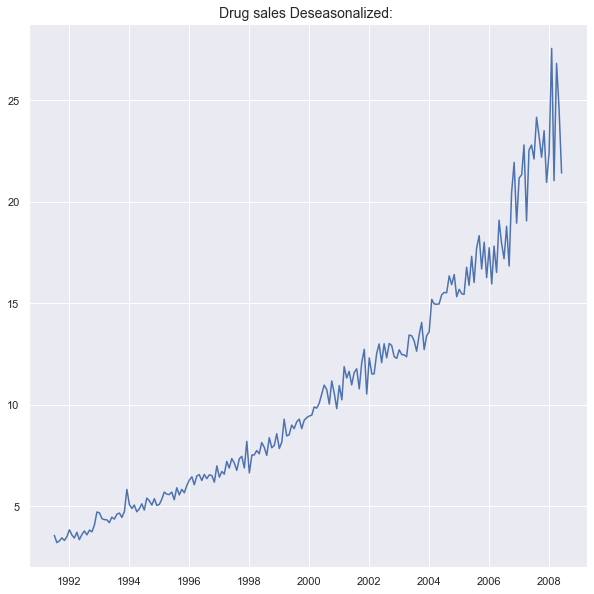

In [44]:
deseasonalized = df.value.values/result_mul.seasonal 

# plot
plt.plot(deseasonalized)
plt.title('Drug sales Deseasonalized: ', fontsize=14)
plt.plot()

### Test for seasonality 

if there is a repetition after certain interval of time, this pattern is called seasonality 
it can be captured using autocorrelation function (acf) curve, indicated by the spikes in the pattern

in real world dataset if might be difficult to observe such trends due to presence of noise



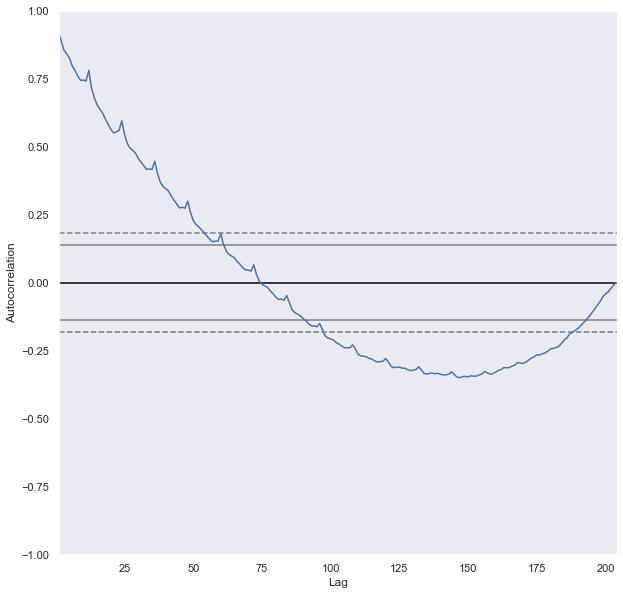

In [45]:
from pandas.plotting import autocorrelation_plot

# draw plot
autocorrelation_plot(df.value.tolist())
plt.show()

in this example we can see the pattern being repeated after every year indicated by the spikes at position 12 24 36 etc i.e every year in the autocorrelation
curve above

### Treat missing value in time-series

In [46]:
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error

In [47]:
df_missing = pd.read_csv('a10_missing.csv',index_col='date',parse_dates=True)

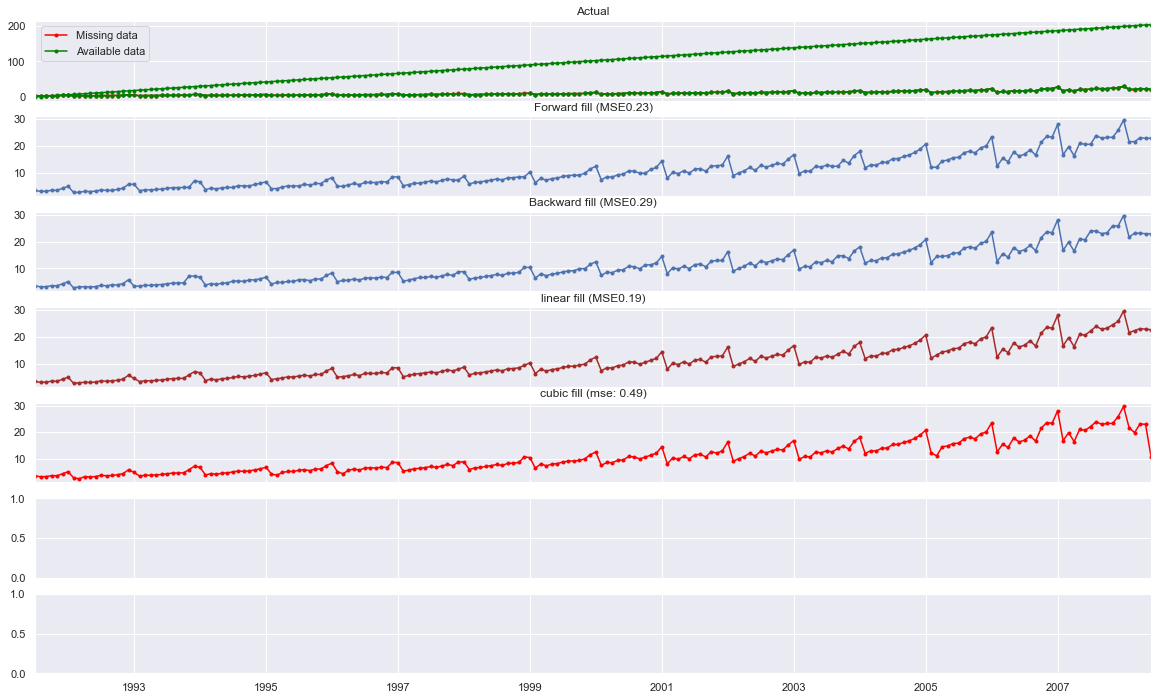

In [54]:
fig,axes = plt.subplots(7,1,sharex=True,figsize=(20,12))
plt.rcParams.update({'xtick.bottom':False})

# actual plot

df.plot(title='Actual', ax=axes[0], label='Actual', color='red', style='.-')
df_missing.plot(title='Actual',ax=axes[0], label='Actual',color='green', style='.-')
axes[0].legend(['Missing data', 'Available data'])


# forward-fill
df_ffill = df_missing.ffill()
error = np.round(mean_squared_error(df['value'],df_ffill['value']),2)
df_ffill['value'].plot(title='Forward fill (MSE'+str(error)+')', ax=axes[1], label='Forward Fill', style='.-')

# backward-fill
df_bfill = df_missing.bfill()
df_bfill=df_bfill.fillna(method='ffill')
error = np.round(mean_squared_error(df['value'],df_bfill['value']),2)
df_bfill['value'].plot(title='Backward fill (MSE'+str(error)+')', ax=axes[2], label='Backward Fill', style='.-')



### linear_interpolation
df_missing['rownum']= np.arange(df_missing.shape[0])
df_nona = df_missing.dropna(subset=['value'])
f = interp1d(df_nona['rownum'],df_nona['value'],fill_value='extrapolate')
df_missing['linear_fill'] = f(df_missing['rownum'])
error = np.round(mean_squared_error(df['value'],df_missing['linear_fill']),2)
df_missing['linear_fill'].plot(title='linear fill (MSE'+str(error)+ ')',ax=axes[3], label='linear fill', color='brown', style='.-')

## cubic interpolation
f2 = interp1d(df_nona['rownum'],df_nona['value'],kind='cubic',fill_value='extrapolate')
df_missing['cubic_fill']=f2(df_missing['rownum'])
error = np.round(mean_squared_error(df['value'],df_missing['cubic_fill']),2)
df_missing['cubic_fill'].plot(title='cubic fill (mse: '+str(error)+')',ax=axes[4], label='cubic fill', color='red', style='.-')





### Autocorrelation and partial autocorrelation function

correlation of series with its own lag - auto correaltion


pure correlation of a series and its lag excluding the intermediate lag is called partial autocorrelation

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


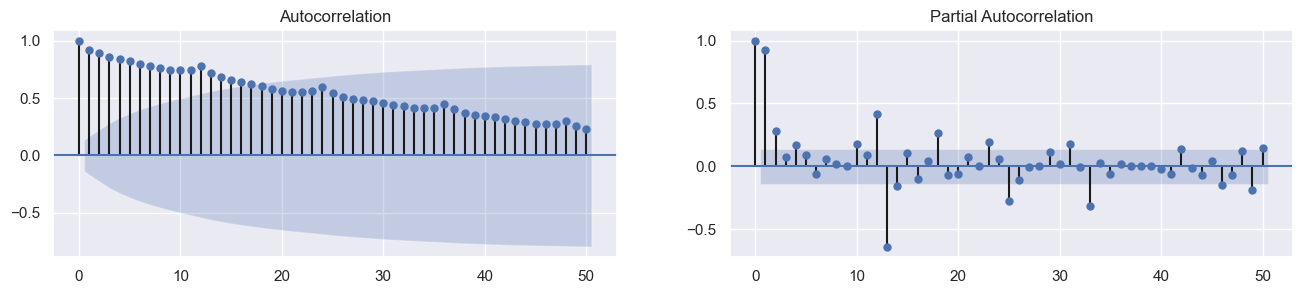

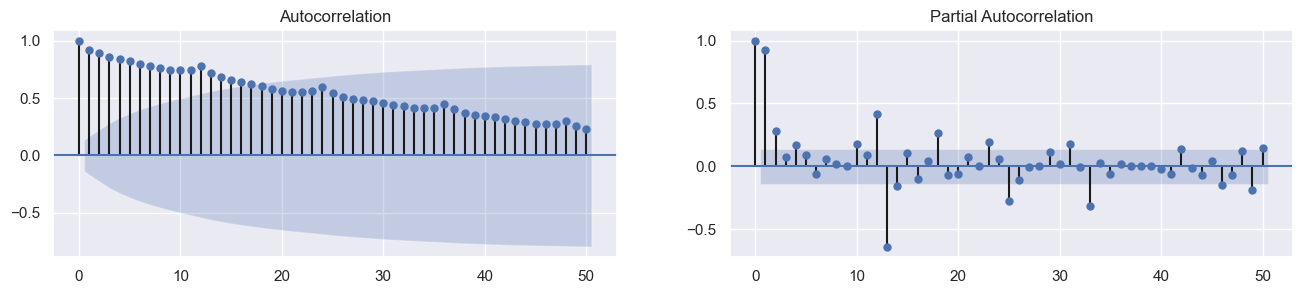

In [55]:
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv')

## calculate acf and pacf upto 50 lags

acf_50 = acf(df['value'],nlags=50)
pacf_50 = pacf(df['value'],nlags=50)

# draw plot
fig,axes = plt.subplots(1,2,figsize=(16,3),dpi=100)
plot_acf(df['value'].tolist(),lags=50, ax=axes[0])
plot_pacf(df['value'].tolist(),lags=50, ax=axes[1])


### Lag Plots:  scatter plot of the series with its own lag 

used to check if there exist autocorrelation between series and its lag

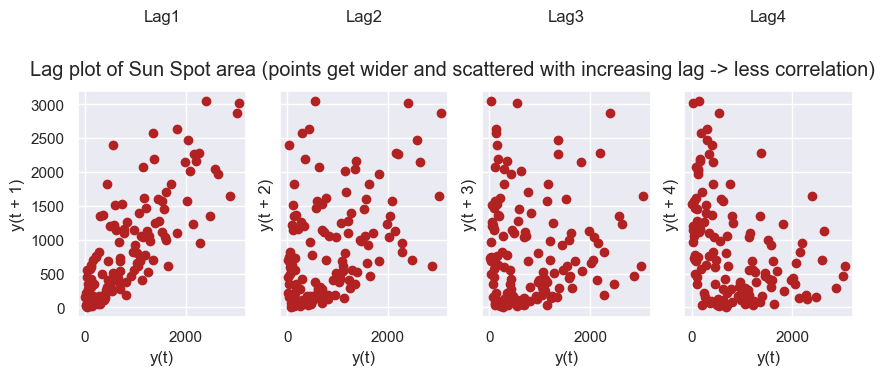

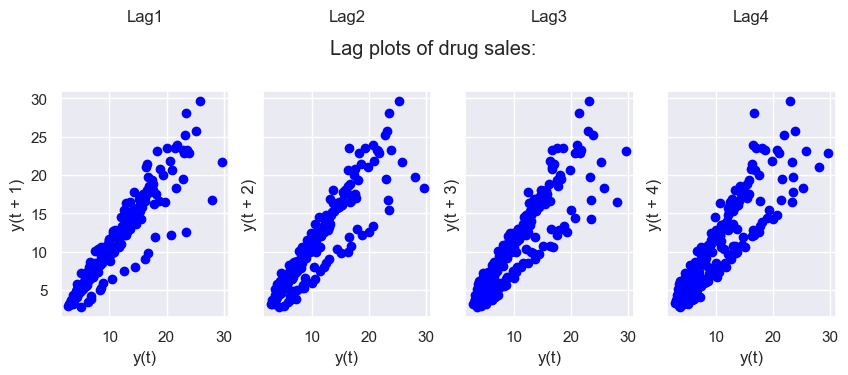

In [60]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left':False, 'axes.titlepad':50})

# Import
ss = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/sunspotarea.csv')
a10 = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv')

fig,axes = plt.subplots(1,4,figsize=(10,3),sharex=True, sharey=True,dpi=100)
for i,ax in enumerate(axes.flatten()[:4]):
    lag_plot(ss.value, lag=i+1,ax=ax,c='firebrick')
    ax.set_title('Lag'+str(i+1))

fig.suptitle('Lag plot of Sun Spot area (points get wider and scattered with increasing lag -> less correlation)')


fig,axes = plt.subplots(1,4,figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i,ax in enumerate(axes.flatten()[:4]):
    lag_plot(a10['value'],lag=i+1, ax=ax, c='blue')
    ax.set_title('Lag'+str(i+1))
fig.suptitle('Lag plots of drug sales: ',y=1.05)
plt.show()

### Estimate forecastablity of time series

if more regular a timeseries(less entropy)--> easier it to forecast the future prediction

entropy is the measure of randomness

In [61]:
ss = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/sunspotarea.csv')
a10 = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv')
rand_small = np.random.randint(0, 100, size=36)
rand_big = np.random.randint(0, 100, size=136)


### Smoothing a timeseries

- reduces noise
- smoothed version - feature for original series
- to visualize the underlying trend better

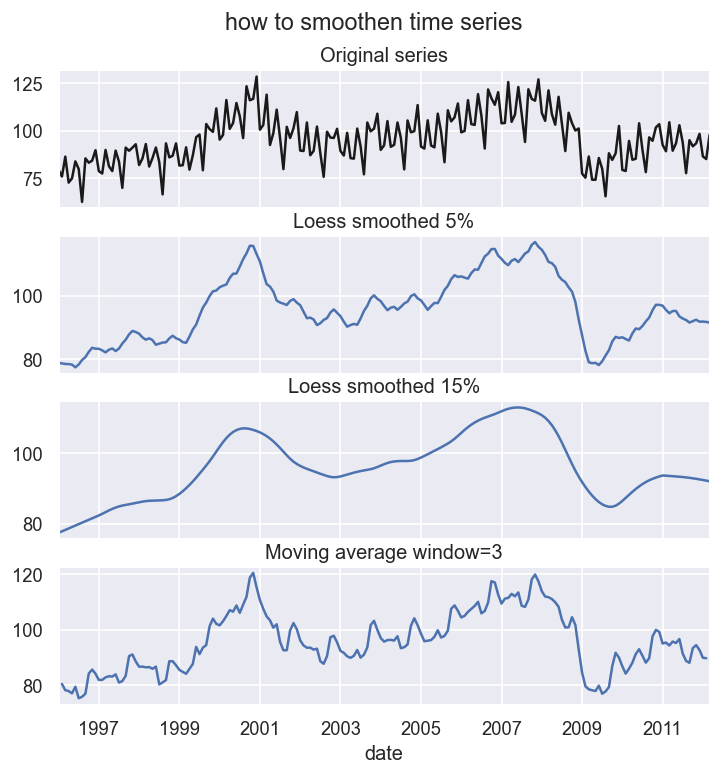

In [72]:
from statsmodels.nonparametric.smoothers_lowess import lowess
plt.rcParams.update({'xtick.bottom':False,'axes.titlepad':5})

df_orig = pd.read_csv('elecequip.csv', parse_dates=['date'], index_col='date')

# moving average
df_ma = df_orig['value'].rolling(3, center=True, closed='both').mean()

# loess smoothing (5% and 15%)
df_loess_5 = pd.DataFrame(lowess(df_orig.value, np.arange(len(df_orig.value)),frac=0.05)[:,1],index=df_orig.index,columns=['value'])
df_loess_15 = pd.DataFrame(lowess(df_orig.value,np.arange(len(df_orig.value)),frac=0.15)[:,1],index=df_orig.index,columns=['value'])

#plot

fig,axes = plt.subplots(4,1,figsize=(7,7),sharex=True, dpi=120)
df_orig['value'].plot(title='Original series',c='k',ax=axes[0])
df_loess_5['value'].plot(title='Loess smoothed 5%',ax=axes[1])
df_loess_15['value'].plot(title='Loess smoothed 15%',ax=axes[2])
df_ma.plot(ax=axes[3],title='Moving average window=3')
fig.suptitle('how to smoothen time series',y=0.95,fontsize=14)
plt.show()






### Granger Casuality test


to test if lag of another variable (x) and lag of this varible(y) is useful in predicting this variable (y) than lag
of y alone or not?
if p<0.05, lag of x is useful in predicting the value of y else not

In [74]:
from statsmodels.tsa.stattools import grangercausalitytests
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])
df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [75]:
df['month']=df.date.dt.month
grangercausalitytests(df[['value','month']], maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=54.7797 , p=0.0000  , df_denom=200, df_num=1
ssr based chi2 test:   chi2=55.6014 , p=0.0000  , df=1
likelihood ratio test: chi2=49.1426 , p=0.0000  , df=1
parameter F test:         F=54.7797 , p=0.0000  , df_denom=200, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=162.6989, p=0.0000  , df_denom=197, df_num=2
ssr based chi2 test:   chi2=333.6567, p=0.0000  , df=2
likelihood ratio test: chi2=196.9956, p=0.0000  , df=2
parameter F test:         F=162.6989, p=0.0000  , df_denom=197, df_num=2


{1: ({'ssr_ftest': (54.7796748355736, 3.661425871353102e-12, 200.0, 1),
   'ssr_chi2test': (55.6013699581072, 8.876175235021508e-14, 1),
   'lrtest': (49.14260233004984, 2.38014300604565e-12, 1),
   'params_ftest': (54.77967483557362, 3.6614258713530505e-12, 200.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (162.6989179987325, 1.913323508685587e-42, 197.0, 2),
   'ssr_chi2test': (333.6566643222738, 3.52676008812746e-73, 2),
   'lrtest': (196.9955927718221, 1.670900349911483e-43, 2),
   'params_ftest': (162.69891799873264, 1.913323508685476e-42, 197.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

since p-value for test cases is less than 0.05. thus month can be used to predict the air passenger